#  Airbnb 

IT is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

### Problem Statement:

1) To predict the nightly prices for different accomodations.

2) To check factors that influences the price.

3) Does the grographical location plays an important role in deciding the price factor.

4) What is a difference between host and a super host


### Data Description:

Id- Serial no.

price- price per night

host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)

host_total_listings_count:how many listings the host is responsible for in total.

host_identity_verified: t- True, the host identity is verified, f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)

latitude: geographical location of the place with respect to latitude.

longitude: geographical location of the place with respect to longitute.

property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)

room_type: Type of room (e.g. sharing, private, entire house etc)

accommodates: total no. of people the property can accommodate.

bathrooms: no. of bathrooms.

bedrooms: no. of bedrooms

beds:no. of beds. 

security_deposit: security deposit amount.

cleaning_fee: fee charged for cleaning.

extra_people: extra people charges.

minimum_nights: duration of stay minimum nights. 

maximum_nights: duration of stay maximum nights.

number_of_reviews: total no. of reviews.

(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)

instant_bookable- t-True booking can be done instantly, f-False booking cannot be done instantly.

is_business_travel_ready: is it ready for stay related to business purpose.

cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)

reviews_per_month: monthly review scores

### Target Variable: 

Price: This variable displayes the price per night of different host

## Importing and Data Inspection

#### Step 1: import important libraries and reading the dataset

In [28]:
import pandas as pd     # data processing
import numpy as np      # linear algebra
import matplotlib.pyplot as plt  # data visualization
%matplotlib inline
import seaborn as sns           # seaborn is another library for visualization of data
colour=sns.color_palette()

In [29]:
air_df=pd.read_csv('D:\\datas\\airbnb_train.csv') # reading the data set

In [30]:
print(air_df.shape)  #checking the data dimensions

(1000, 30)


the dataset has 1000 observations with 30 variables

#### Step 2: Data Inspection

In [31]:
pd.set_option('display.max_column',30) # to display all the columns of the dataset, we set max column limit
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [32]:
air_df.info()  #to get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we notice the following:

1) the dataset has float, int and object type datas

2) the datas in the object type variable are boolean values i.e True or false

3) We also notice a lot of missing value with some variables, we shall go for a deeper analysis for the same.

In [33]:
air_df.describe().T #statistical description of the continuous variables

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
price,1000.0,145.521000,91.428523,18.000000,75.000000,120.000000,195.750000,449.000000
host_total_listings_count,998.0,7.044088,27.234486,1.000000,1.000000,1.000000,2.000000,205.000000
latitude,1000.0,-33.866773,0.068062,-34.092546,-33.899661,-33.884990,-33.843008,-33.401800
longitude,1000.0,151.205647,0.080778,150.651014,151.182542,151.217358,151.261443,151.338687
accommodates,1000.0,2.988000,1.681869,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,997.0,1.255266,0.488096,0.000000,1.000000,1.000000,1.500000,4.000000
bedrooms,1000.0,1.406000,0.797371,0.000000,1.000000,1.000000,2.000000,5.000000
beds,998.0,1.748497,1.122342,0.000000,1.000000,1.000000,2.000000,9.000000
security_deposit,574.0,395.393728,466.069393,0.000000,150.000000,300.000000,500.000000,6000.000000


from the above statistical description we can see that:

1) host_total_listings_count, bathrooms, beds, security_deposit, cleaning_fee and reviews on different category have missing values.

2) variables like host_total_listing_counts, security_deposit, extra_people, maximum_nights and number_of_reviews seems to have outliers.

we need detailed investigation into outliers and missing values situations in order to take the necessary steps

In [34]:
air_df.describe(include=object)  #Dataset description for object variable

,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,is_business_travel_ready,cancellation_policy
count,998,998,1000,1000,1000,1000,1000
unique,2,2,19,3,2,2,3
top,f,f,Apartment,Entire home/apt,f,f,strict
freq,905,509,651,589,693,976,392


We can see that most variables has only two levels i.e true or false, some varibles like room_type and cancellation_policy has 3 levels and variable property_type has 19 levels.

host_is_superhost and host_identity_verified have 2 missing values each

## Data Pre-Processing

#### Step 3: Missing Value Imputation

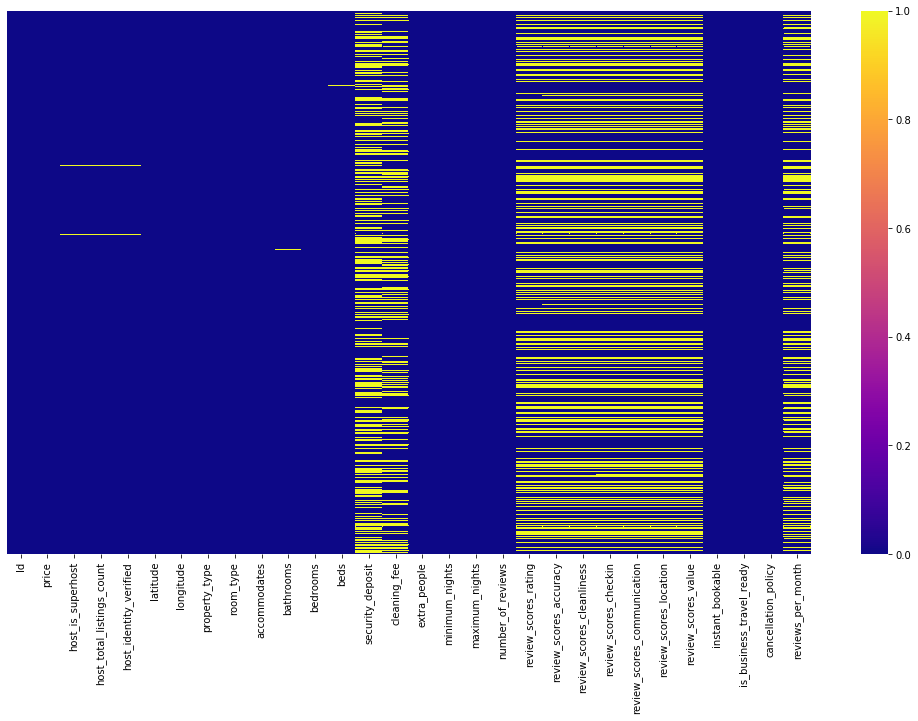

In [35]:
plt.figure(figsize=(18,10))   #graphical presentation of missing values in the dataset
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma') 

In [36]:
air_df.isnull().sum()    # total no. of null values in each column

Id                               0
price                            0
host_is_superhost                2
host_total_listings_count        2
host_identity_verified           2
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        3
bedrooms                         0
beds                             2
security_deposit               426
cleaning_fee                   307
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           340
review_scores_accuracy         342
review_scores_cleanliness      342
review_scores_checkin          344
review_scores_communication    343
review_scores_location         344
review_scores_value            344
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy 

In [37]:
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((air_df[col].isnull().sum()/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [38]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
5,security_deposit,426,42.6
10,review_scores_checkin,344,34.4
12,review_scores_location,344,34.4
13,review_scores_value,344,34.4
11,review_scores_communication,343,34.3
8,review_scores_accuracy,342,34.2
9,review_scores_cleanliness,342,34.2
7,review_scores_rating,340,34.0
14,reviews_per_month,311,31.1
6,cleaning_fee,307,30.7


from the above information we can see  that: 

security_deposit- has 42.6 % null values with 426 missing information 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value--has 34.4% missing values with 344,342 and 340 missing information in each column

reviews_per_month has 31.1% missing values with 311 missing information and cleaning_fee has 30.7% missing values with 307 missing information 

In [39]:
#imputing missing values for continuous variables
for num in air_df.select_dtypes(('float64', 'int64')):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].median())

In [40]:
#imputing the missing value of a categorical variables
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

#### Step 4: Outlier Analysis

In some cases, the values of the variables fall in the extreme range, which will impact the modeling in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5IQR) and (Q3+1.5IQR)

IQR- Inter-quartile range,
Q1- first quartile 
Q3-third quartile

sometimes times these values are random, but sometimes it is not random it adds certain information to the data. In these cases we cannot drop these outliers. We term them as business outliers.

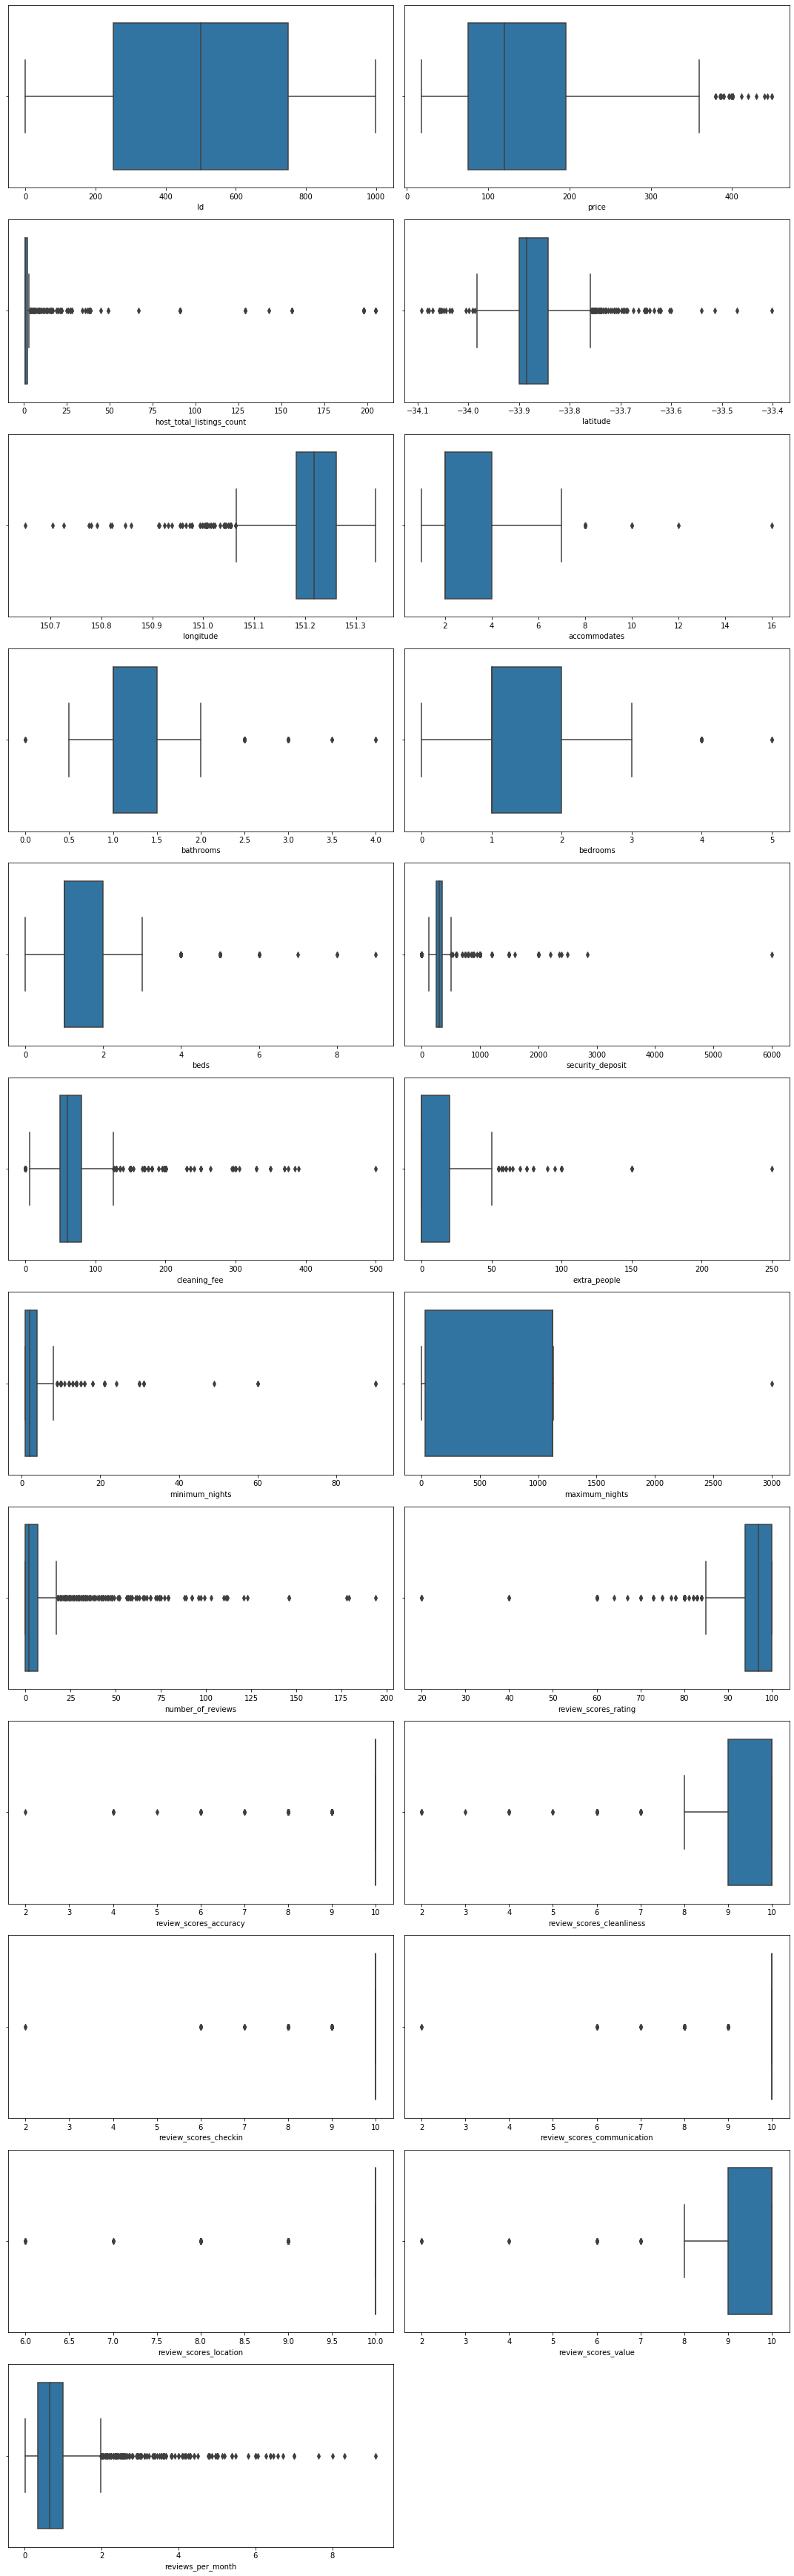

In [41]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(('int64', 'float64')):
    plt.subplot(15,2,n)
    sns.boxplot(x=air_df[column])
    plt.tight_layout()
    n=n+1
plt.show()

host_total_listings: we see some hosts have listing more than 50. this can be business outliers,

accommodates: some host do have provisions to accommodate larger group. similarly with bathrooms, bedrooms and beds

maximun_nights_stay: 3000 nights stay cannot be accounted practically. we can remove the outlier in maximum nights. 
minimum_nights: in general minimum night stay is mostly  between 1 - 2 , inorder to avoide unnecessary information loss we shall  drop the data above 20 minimum nights

security deposit, cleaning fee, extra people charges and reviews seem to have outlier that can be potentially business outliers. 
We can always come back to outliers analysis, if we face any accuracy problem while fitting the models

In [42]:
(air_df['maximum_nights'].values>20).sum()  # how many data points are above 20

17

In [43]:
air_df=air_df[air_df['minimum_nights']<20]

In [44]:
air_df=air_df[air_df['maximum_nights']<1500]

In [46]:
air_df.shape

(982, 30)

Let's convert all the obeject variables into categorical variables 

In [48]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 

Id                                int64
price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                      int64
bathrooms                       float64
bedrooms                          int64
beds                            float64
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64


## Exploratory Data Analysis

#### part 1: Univariate Analysis

Step 5: Target Variable

Text(0, 0.5, 'Frequency')

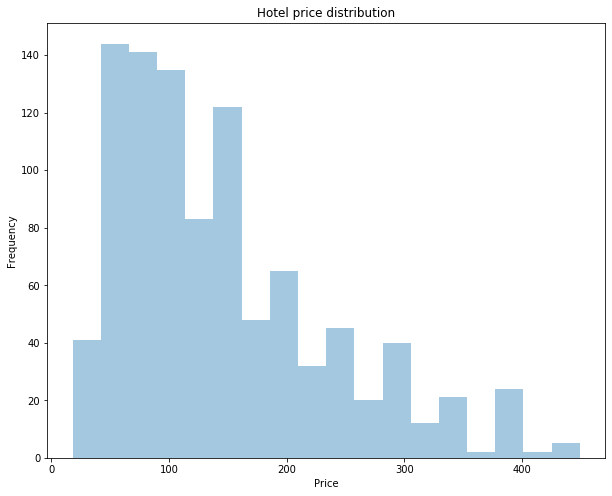

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(air_df['price'], kde=False)
plt.title('Hotel price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

from the above graph we can see that the nightly prices are right skewed, this means that the mean will be higher than the mode. night prices of most hosts are between 50 to 200.

first lets sort categorical variable having more than two categories (property_type,room_type, cancelltion policy) 

In [14]:
air_df['property_type'].value_counts()

Apartment          651
House              254
Townhouse           32
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Villa                6
Cabin                6
Loft                 3
Guest suite          2
Bungalow             2
Vacation home        2
Boat                 2
Hostel               1
Boutique hotel       1
Dorm                 1
Timeshare            1
In-law               1
Name: property_type, dtype: int64

In [23]:
air_df.head(10)

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.000000,330.000000,0,7,1125,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,strict,0.530000
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,395.393728,75.176046,0,21,30,0,93.322727,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,f,f,flexible,1.203745
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.000000,180.000000,0,3,90,21,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.00000,f,f,moderate,2.380000
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.000000,80.000000,0,4,1125,3,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,flexible,1.960000
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.000000,85.000000,50,2,30,22,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,moderate,2.730000
5,5,360,f,1.0,f,-33.893954,151.244907,House,Entire home/apt,6,1.0,3,4.0,395.393728,70.000000,0,2,1125,7,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,flexible,0.280000
6,6,350,f,1.0,t,-33.889091,151.277290,Apartment,Entire home/apt,4,1.0,2,2.0,395.393728,50.000000,0,2,1125,2,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.00000,t,f,moderate,0.160000
7,7,117,f,1.0,t,-33.878998,151.233890,Apartment,Entire home/apt,2,1.0,1,1.0,395.393728,35.000000,30,1,1125,5,80.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.00000,f,f,moderate,0.450000
8,8,188,f,2.0,t,-33.887270,151.273031,Apartment,Entire home/apt,6,1.0,2,3.0,0.000000,80.000000,40,3,365,73,92.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.00000,t,t,strict,2.930000
9,9,120,f,1.0,t,-33.895825,151.259695,Apartment,Entire home/apt,2,1.0,1,1.0,395.393728,75.176046,0,1,1125,0,93.322727,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,t,f,flexible,1.203745


In [24]:
air_df.shape

(1000, 30)

In [25]:
air_df.isnull().any()

Id                             False
price                          False
host_is_superhost              False
host_total_listings_count      False
host_identity_verified         False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
security_deposit               False
cleaning_fee                   False
extra_people                   False
minimum_nights                 False
maximum_nights                 False
number_of_reviews              False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
instant_bookable               False
i

#### So now that we have we have dealt with all the null values we can now go ahead with extensive data exploration.

### Explainatory Data Analysis 

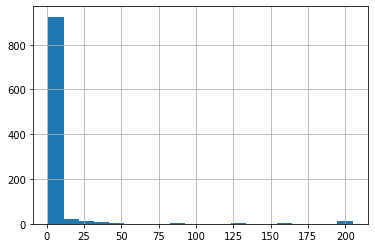

In [27]:
air_df['host_total_listings_count'].hist(bins=20)

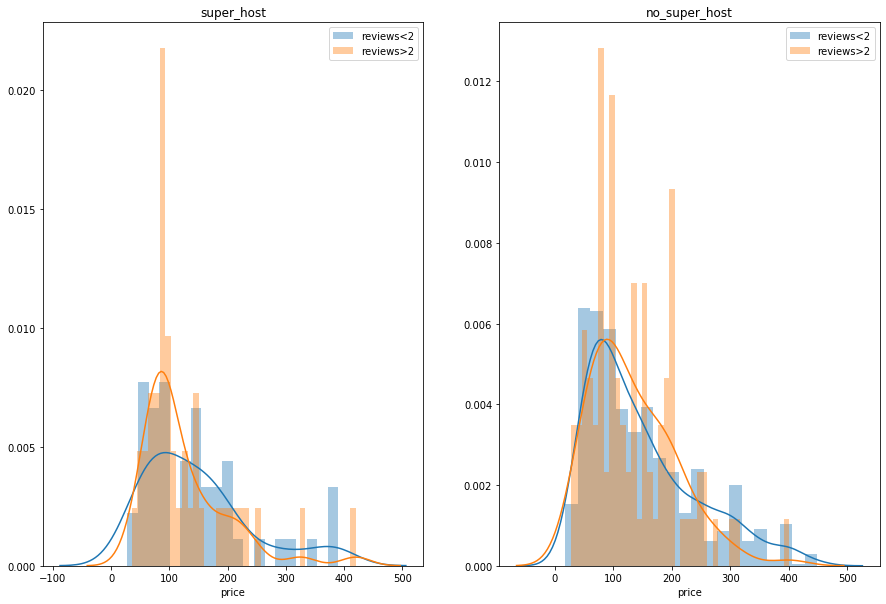

In [28]:
plt.figure(figsize=(15,10))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,2,1)
sns.distplot(super_host[super_host['reviews_per_month']<=2].price, bins=20, label='reviews<2')
sns.distplot(super_host[super_host['reviews_per_month']>2].price, bins=40, label='reviews>2')
plt.title('super_host')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(no_super_host[no_super_host['reviews_per_month']<=2].price, bins=20, label='reviews<2')
sns.distplot(no_super_host[no_super_host['reviews_per_month']>2].price, bins=40, label='reviews>2')
plt.title('no_super_host')
plt.legend()


from the above distribution of data. there is no difference in the price range between and super host and a normal host,
other observatio are:
A normal host there is a high chance of price falling in less than 300 range, hotel with review > 2 has a really very high chance of price falling between 100 to 200

In [29]:
#lets see how the price relation ship between between price and othe columns
num_col=[]
for col in air_df.select_dtypes(('float64', 'int64')):
    num_col.append(col)

In [30]:
num_col

['Id',
 'price',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

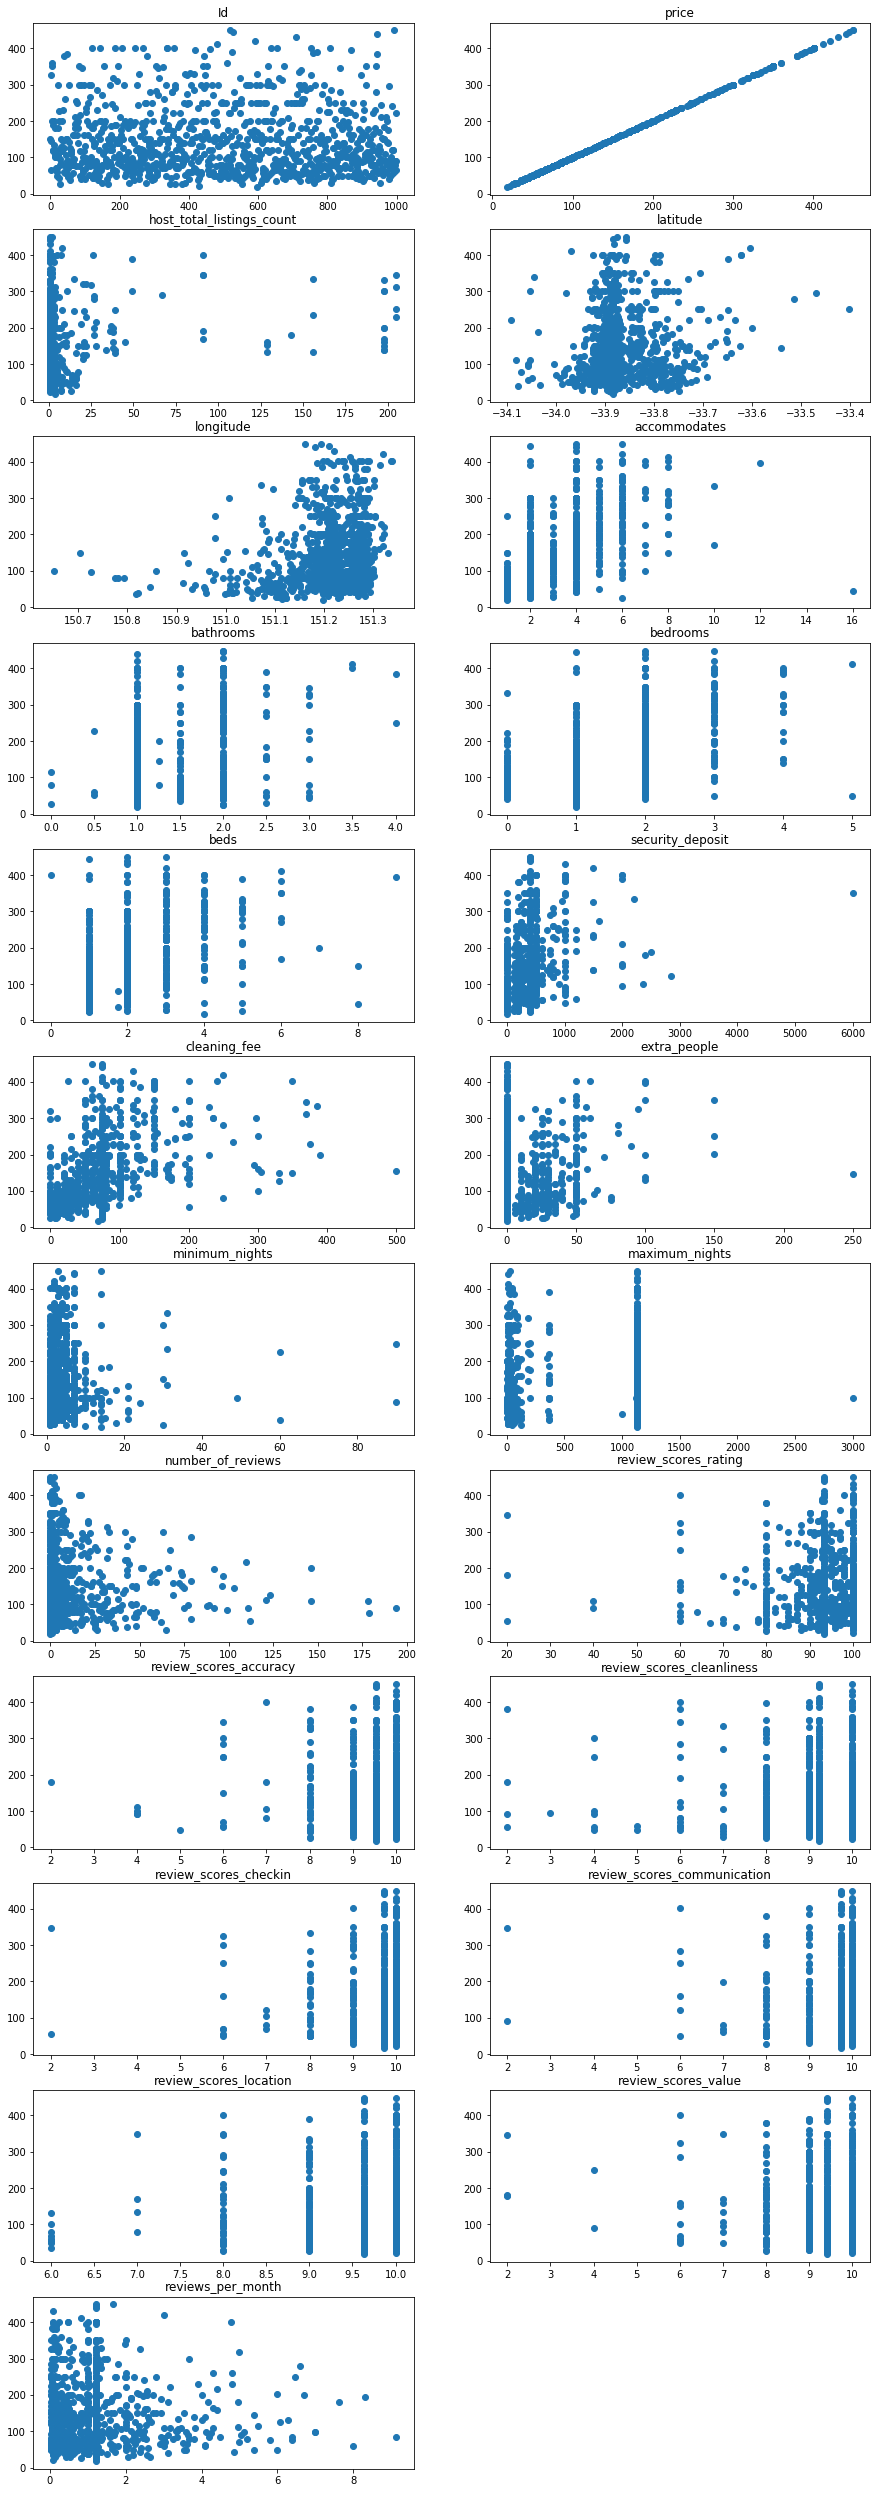

In [31]:
plt.figure(figsize=(15,45))
n=1
for x in num_col:
    plt.subplot(12,2,n)
    plt.scatter(air_df[x],air_df['price'])
    plt.title(x)
    n=n+1
    #plt.tight_layout()
    
plt.show()

In [32]:
n=1
for x in num_col:
    corr=air_df['price'].corr(air_df[x])
    print(x,corr)
    n=n+1

Id -0.04026798331141544
price 1.0
host_total_listings_count 0.16484956534569792
latitude 0.09247182476739686
longitude 0.2315755681945448
accommodates 0.6250689194451267
bathrooms 0.33243153395772884
bedrooms 0.5736476113255878
beds 0.5300159095336591
security_deposit 0.253923239319484
cleaning_fee 0.42601854128324357
extra_people 0.09882260945109231
minimum_nights 0.043209361351907095
maximum_nights 0.030579744572289944
number_of_reviews -0.04020036777080381
review_scores_rating 0.01566453385516733
review_scores_accuracy -0.01065401328839299
review_scores_cleanliness 0.015246262245004104
review_scores_checkin -0.008805873774546296
review_scores_communication -0.035783012167921534
review_scores_location 0.09838331349044215
review_scores_value -0.06087183207107058
reviews_per_month -0.05705478495712303


##### Summary relation between price and other indepented variables from the scatter plot and correlation.
- Accomodates:
as the range of accommodates increases so does the price increases, the average starting range for more than 4 accommodates is higher
- bedrooms, beds: 
price increases with the increase in no. of bedrooms and beds
- cleaning fee:
most of the places charges between 0-100, cleaning fee higher than 200 price/night is higher as compare to the lower ranges
- longitude :
151.0 to 151.3 has higher price range as compared to longitude <151.



In [33]:
air_df['review_scores_cleanliness'].unique()

array([10.        ,  9.23556231,  9.        ,  8.        ,  5.        ,
        7.        ,  2.        ,  3.        ,  6.        ,  4.        ])

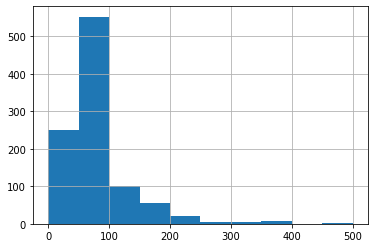

In [34]:
air_df['cleaning_fee'].hist(bins=10)

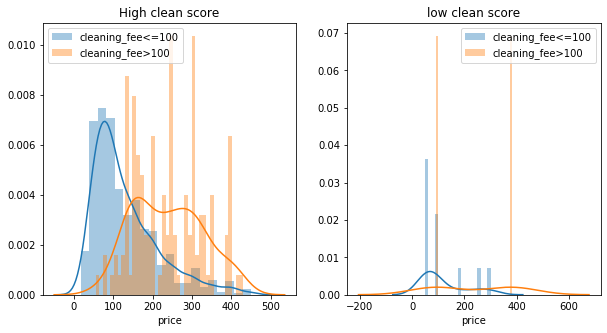

In [35]:
plt.figure(figsize=(10,5))
high_clean_score=air_df[air_df['review_scores_cleanliness']>5]
low_clean_score=air_df[air_df['review_scores_cleanliness']<=5]
plt.subplot(1,2,1)
sns.distplot(high_clean_score[high_clean_score['cleaning_fee']<=100].price, bins=20, label='cleaning_fee<=100')
sns.distplot(high_clean_score[high_clean_score['cleaning_fee']>100].price, bins=40, label='cleaning_fee>100')
plt.title('High clean score')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(low_clean_score[low_clean_score['cleaning_fee']<=100].price, bins=20, label='cleaning_fee<=100')
sns.distplot(low_clean_score[low_clean_score['cleaning_fee']>100].price, bins=40, label='cleaning_fee>100')
plt.title('low clean score')
plt.legend()

from the above plot observation we can say that,almost 80-85 % of the places have received cleaniness score>5,
for cleaning fee <=100, hight probabily of price range between 50 to 150.
cleaning fee >100 has price range between 150 to 350

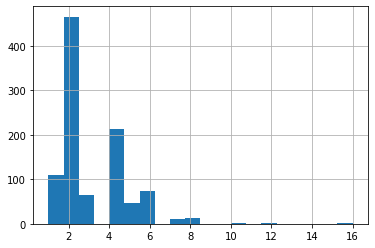

In [36]:
air_df['accommodates'].hist(bins=20)

[Text(0, 0, 'Apartment'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Boutique hotel'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Dorm'),
 Text(0, 0, 'Guest suite'),
 Text(0, 0, 'Guesthouse'),
 Text(0, 0, 'Hostel'),
 Text(0, 0, 'House'),
 Text(0, 0, 'In-law'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Timeshare'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Vacation home'),
 Text(0, 0, 'Villa')]

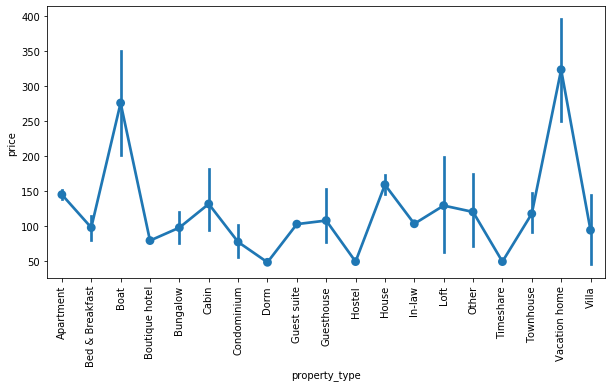

In [37]:
plt.figure(figsize=(10,5))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

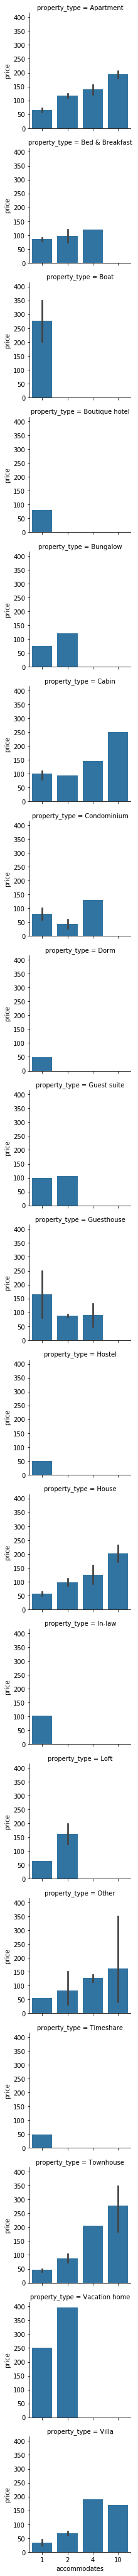

In [38]:
FacetGrid=sns.FacetGrid(air_df,row='property_type')
FacetGrid.map(sns.barplot,'accommodates', 'price',palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

####### We notice that properties like 
Boat and vacation home- price range is very high with fewer accomodation
villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


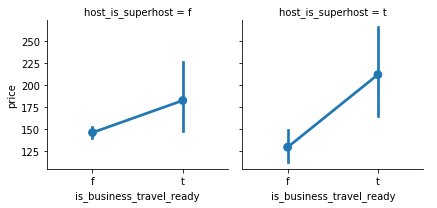

In [39]:
FacetGrid=sns.FacetGrid(air_df,col='host_is_superhost')
FacetGrid.map(sns.pointplot,'is_business_travel_ready', 'price', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

from the about graph we can infer that in generally the price for business purpose is higher. Also, price range for super host business purpose bookings are having a higher price range

Text(0.5, 1.0, 'minimum/nights')

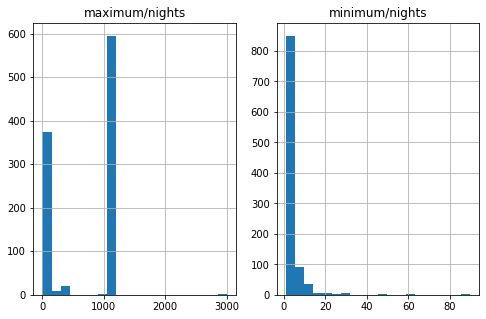

In [40]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
air_df['maximum_nights'].hist(bins=20)
plt.title('maximum/nights')
plt.subplot(1,2,2)
air_df['minimum_nights'].hist(bins=20)
plt.title('minimum/nights')

from the above graph we can infer that around 60% of places charges 1000+ night charges (max range)

Lets check for outliers in each column

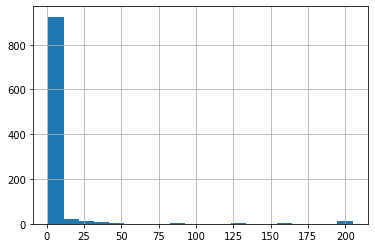

In [41]:
air_df['host_total_listings_count'].hist(bins=20)

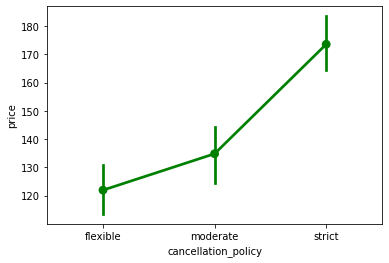

In [42]:
sns.pointplot(air_df['cancellation_policy'],air_df['price'], color='green')

from the above plot we can learn that the price range increase as the cancellation policy moves form flexible to strict

No handles with labels found to put in legend.


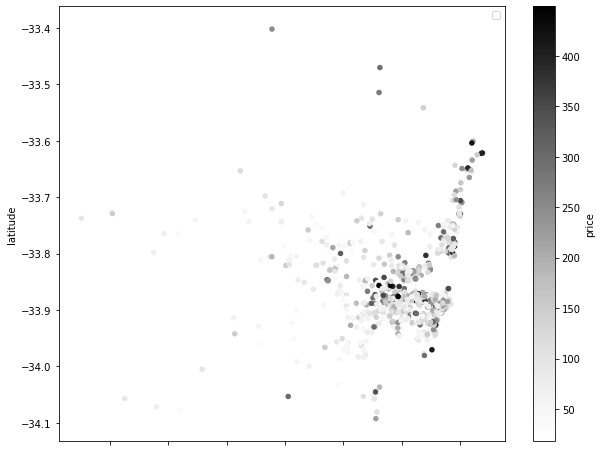

In [43]:
air_df.plot(kind='scatter',x='longitude',y='latitude', c='price',figsize=(10,8), colorbar=True, alpha=1)
plt.xlabel('longitude')
plt.legend()
plt.show()

We can the scatter of price, the price decrease as we move away from the price. city center price range 200 to 400

### Data Pre-processing

In [45]:
(air_df['security_deposit'].values>3000).sum()

1

In [46]:
air_df=air_df[air_df['security_deposit']<3000]

In [47]:
(air_df['cleaning_fee'].values>400).sum()

1

In [48]:
air_df=air_df[air_df['cleaning_fee']<400]

In [49]:
(air_df['extra_people'].values>150).sum()

1

In [50]:
air_df=air_df[air_df['extra_people']<150]

In [51]:
(air_df['minimum_nights'].values>60).sum()

2

In [52]:
air_df=air_df[air_df['minimum_nights']<60]

In [53]:
(air_df['maximum_nights'].values>1500).sum()

1

In [54]:
air_df=air_df[air_df['maximum_nights']<1500]

In [55]:
(air_df['review_scores_rating'].values<40).sum()

3

In [56]:
air_df=air_df[air_df['review_scores_rating']>40]

In [58]:
air_df.shape

(985, 30)

#### Scaling Numeric Feautres

In [753]:
from sklearn.preprocessing import MinMaxScaler
num_col

['Id',
 'price',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [755]:
numeric=air_df.loc[:,num_col]
nums=MinMaxScaler().fit_transform(numeric)
nums=np.round_(nums,2)
numeric=pd.DataFrame(nums,columns=num_col)
numeric.shape

(985, 23)

In [756]:
cat_col=[]
for col in air_df.select_dtypes('category'):
    cat_col.append(col)

In [757]:
cat=air_df.loc[:,cat_col]
cat=pd.DataFrame(cat)

In [759]:
cat.shape

(985, 7)

In [760]:
air_df=pd.concat([cat,numeric],axis=1)

In [761]:
air_df.head()

,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,is_business_travel_ready,cancellation_policy,Id,price,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,f,t,Apartment,Entire home/apt,f,f,strict,0.0,0.31,0.10,0.36,0.81,0.07,0.25,0.2,0.11,0.18,0.85,0.0,0.12,1.00,0.01,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.06
1,f,t,Apartment,Private room,f,f,flexible,0.0,0.11,0.00,0.28,0.76,0.07,0.38,0.2,0.11,0.14,0.19,0.0,0.42,0.03,0.00,0.83,0.92,0.9,0.93,0.93,0.91,0.92,0.13
2,t,t,House,Entire home/apt,f,f,moderate,0.0,0.71,0.00,0.31,0.83,0.20,0.50,0.4,0.22,0.18,0.46,0.0,0.04,0.08,0.11,0.98,1.00,1.0,1.00,1.00,1.00,0.88,0.26
3,f,f,House,Entire home/apt,f,f,flexible,0.0,0.29,0.00,0.34,0.73,0.33,0.38,0.6,0.44,0.00,0.21,0.0,0.06,1.00,0.02,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.21
4,f,t,House,Entire home/apt,f,f,moderate,0.0,0.42,0.02,0.27,0.77,0.20,0.25,0.4,0.22,0.12,0.22,0.5,0.02,0.03,0.11,0.93,1.00,1.0,1.00,1.00,1.00,1.00,0.30


In [763]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
host_is_superhost              985 non-null category
host_identity_verified         985 non-null category
property_type                  985 non-null category
room_type                      985 non-null category
instant_bookable               985 non-null category
is_business_travel_ready       985 non-null category
cancellation_policy            985 non-null category
Id                             985 non-null float64
price                          985 non-null float64
host_total_listings_count      985 non-null float64
latitude                       985 non-null float64
longitude                      985 non-null float64
accommodates                   985 non-null float64
bathrooms                      985 non-null float64
bedrooms                       985 non-null float64
beds                           985 non-null float64
security_deposit               985 non-null float64
cle

#### labe encoding for categorical variables

In [764]:
from sklearn.preprocessing import LabelEncoder

In [765]:
le=LabelEncoder()

In [766]:
for col in air_df.select_dtypes('category'):
    air_df[col]=le.fit_transform(air_df[col].astype('str'))

In [767]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
host_is_superhost              1000 non-null int32
host_identity_verified         1000 non-null int32
property_type                  1000 non-null int32
room_type                      1000 non-null int32
instant_bookable               1000 non-null int32
is_business_travel_ready       1000 non-null int32
cancellation_policy            1000 non-null int32
Id                             985 non-null float64
price                          985 non-null float64
host_total_listings_count      985 non-null float64
latitude                       985 non-null float64
longitude                      985 non-null float64
accommodates                   985 non-null float64
bathrooms                      985 non-null float64
bedrooms                       985 non-null float64
beds                           985 non-null float64
security_deposit               985 non-null float64
cleaning_fee     

In [769]:
for num in air_df.select_dtypes('float64'):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].mean())

#### Modelling 

Model1: scikitlean -Linear Regression

In [770]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

now lets split the data sent in to train and test

In [771]:
x=air_df.drop('price',axis=1)
y=air_df['price']                        #splitting the x-target and y-feature

In [772]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [773]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 29)
(200, 29)
(800,)
(200,)


In [774]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [775]:
y_pred=model1.predict(x_test)

In [776]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
507,0.14,0.080100
818,0.12,0.186048
452,0.31,0.430906
368,0.27,0.230496
242,0.10,0.049335


In [777]:
from sklearn import metrics

In [778]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',RMSE)

Root mean squared error: 0.16194251112342606


In [779]:
r_sq=metrics.r2_score(y_test,y_pred)
print('R_squared error:',r_sq)

R_squared error: 0.5165545420411742


the root mean squared and the R_squared do not fall the in the desirable range. this means the model is not doing a gr8 job here.
so now lets check the residual plot to see if the linear assumptions are satisfied

##### Model2: random Forest

In [780]:
from sklearn.ensemble import RandomForestRegressor

In [781]:
rand=RandomForestRegressor(n_estimators=250, min_samples_leaf=5, max_depth=95)

In [782]:
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=95,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [783]:
pred_rand=rand.predict(x_test)

In [784]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
result.head()

,Actual,Predicted
507,0.14,0.075812
818,0.12,0.163966
452,0.31,0.480590
368,0.27,0.264155
242,0.10,0.105366


In [785]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
RMSE

0.16706171986700008

root mean squared error is 0.168, this means on an averange our prediction is 0.17 $ away from the actual price

In [786]:
rand.score(x_train,y_train)

0.8020795615243925

The Random Forest model is doing a very good job over here. 0.7983 is a good score. its giving is almost 80% accuracy

In [787]:
importance=rand.feature_importances_

In [788]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':importances})
feature_imp

,columns,importances
0,host_is_superhost,0.000639
1,host_identity_verified,0.006590
2,property_type,0.005171
3,room_type,0.003120
4,instant_bookable,0.003722
5,is_business_travel_ready,0.000000
6,cancellation_policy,0.008687
7,Id,0.034872
8,host_total_listings_count,0.004404
9,latitude,0.042643


From the above table it is evident that Accommodates, bedrooms and cleaning fee are the most significant variables 